# Breast Tissue

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Carregando dados

In [2]:
# Caminho dos dados
datapath_breast_tissue = '/home/luis/data/uci/BreastTissue.xls'

In [3]:
data_bt = pd.read_excel(datapath_breast_tissue, sheet_name='Data', index_col='Case #')

### Lendo os dados

In [4]:
data_bt

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534


In [5]:
data_bt.describe(include='all')

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,adi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,NaN,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,NaN,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,NaN,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,NaN,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,NaN,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438


### Separando 'targets' e preditores

In [6]:
data_bt.iloc[:,1:].columns

Index(['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR', 'P'], dtype='object')

In [7]:
lista_col_X = data_bt.iloc[:,1:].columns
X, y = data_bt[lista_col_X], data_bt['Class']

In [8]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### Seleção de características

In [9]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
vt = VarianceThreshold(threshold=0)

In [11]:
vt.fit(X)

VarianceThreshold(threshold=0)

In [12]:
X_vt = X.iloc[:, vt.get_support()]

In [13]:
pd.DataFrame(
    {
        'Feature': X_vt.columns.tolist(),
        'Variance': vt.variances_
    }
).sort_values('Variance', ascending=True)

,Feature,Variance
1,PA500,0.004661
2,HFS,0.010174
5,A/DA,162.475802
6,Max IP,428.130857
7,DR,986.810064
3,DA,1043.793758
0,I0,2697.000000
8,P,2771.603922
4,Area,174410.049979


In [14]:
colunas_relevantes = ['Max IP',
                      'DR',
                      'DA',
                      'I0',
                      'P',
                      'Area']

In [15]:
X_relev = X[colunas_relevantes]

---

## OPF supervisionado

In [16]:
# importando função para dividir o conjunto em treinamento e teste, assim como 
#   fazemos com a função train_test_split do scikit-learn
import opfython.stream.splitter as s

# Importando o OPF supervisionado para classificação
from opfython.models.supervised import SupervisedOPF

### Normalizando

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X_relev, y)

In [20]:
scaler.get_feature_names_out()

array(['Max IP', 'DR', 'DA', 'I0', 'P', 'Area'], dtype=object)

In [21]:
# X_scaled

### Particionando

In [22]:
# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = s.split(
    np.array(X_scaled), np.array(y), percentage=0.65, random_state=42)

2021-11-05 16:10:06,808 - opfython.stream.splitter — INFO — Splitting data ...
2021-11-05 16:10:06,810 - opfython.stream.splitter — DEBUG — X_1: (68, 6) | X_2: (38, 6) | Y_1: (68,) | Y_2: (38,).
2021-11-05 16:10:06,811 - opfython.stream.splitter — INFO — Data splitted.


In [23]:
print('X_train.shape, y_train.shape = ', X_train.shape, y_train.shape)
print('X_test.shape, y_test.shape = ', X_test.shape, y_test.shape)

X_train.shape, y_train.shape =  (68, 6) (68,)
X_test.shape, y_test.shape =  (38, 6) (38,)


### Aplicando o LabelEncoder

O `fit` do OPF retorna erro quando usa strings.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder = LabelEncoder()

In [26]:
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)

### Classificando

In [27]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, y_train_encoded)

# Predição no conjunto de testes
preds = opf.predict(X_test)

2021-11-05 16:10:08,445 - opfython.models.supervised — INFO — Overriding class: OPF -> SupervisedOPF.
2021-11-05 16:10:08,446 - opfython.core.opf — INFO — Creating class: OPF.
2021-11-05 16:10:08,446 - opfython.core.opf — DEBUG — Distance: log_squared_euclidean | Pre-computed distance: False.
2021-11-05 16:10:08,447 - opfython.core.opf — INFO — Class created.
2021-11-05 16:10:08,447 - opfython.models.supervised — INFO — Class overrided.
2021-11-05 16:10:08,448 - opfython.models.supervised — INFO — Fitting classifier ...
2021-11-05 16:10:08,449 - opfython.models.supervised — DEBUG — Finding prototypes ...
2021-11-05 16:10:08,549 - opfython.models.supervised — DEBUG — Prototypes: [48, 51, 65, 1, 21, 27, 12, 60, 37, 33, 42, 57, 7, 63, 40, 53, 25, 36, 19, 35, 44, 22, 43, 30, 18, 46, 26, 54, 64, 41, 16, 47, 15, 11, 5, 67].
2021-11-05 16:10:08,556 - opfython.models.supervised — INFO — Classifier has been fitted.
2021-11-05 16:10:08,556 - opfython.models.supervised — INFO — Training time: 0.1

### Confrontando os resultados

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import opfython.math.general as g

In [29]:
print(classification_report(y_test_encoded, preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.57      1.00      0.73         4
           2       1.00      0.67      0.80         6
           3       0.33      0.25      0.29         4
           4       0.67      0.67      0.67         6
           5       0.60      0.43      0.50         7

    accuracy                           0.71        38
   macro avg       0.67      0.67      0.65        38
weighted avg       0.71      0.71      0.70        38



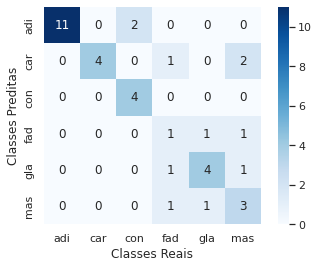

In [30]:
mat = confusion_matrix(y_test_encoded, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=label_encoder.inverse_transform(np.unique(y_test_encoded)),
            yticklabels=label_encoder.inverse_transform(np.unique(preds)),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

In [31]:
# Teste de acurácia
acc = g.opf_accuracy(y_test_encoded, preds)

print(f'Accuracy: {acc}')

Accuracy: 0.8053129779390849


---

## OPF não supervisionado

In [32]:
import opfython.math.general as g
import opfython.stream.parser as p
from opfython.models import UnsupervisedOPF

# Para não ficar mostrando um monte de logs
import logging
logging.disable()

### Normalizando

In [33]:
scaler_unsuper = StandardScaler()

In [34]:
X_scaled_unsuper = scaler_unsuper.fit_transform(X_relev)

In [35]:
scaler_unsuper.get_feature_names_out()

array(['Max IP', 'DR', 'DA', 'I0', 'P', 'Area'], dtype=object)

### Particionando

In [36]:
# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = s.split(
    np.array(X_scaled_unsuper), np.array(y), percentage=0.65, random_state=42)

In [37]:
print('X_train.shape, y_train.shape = ', X_train.shape, y_train.shape)
print('X_test.shape, y_test.shape = ', X_test.shape, y_test.shape)

X_train.shape, y_train.shape =  (68, 6) (68,)
X_test.shape, y_test.shape =  (38, 6) (38,)


### Aplicando o LabelEncoder

In [38]:
label_encoder = LabelEncoder()

In [39]:
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)

### Classificando

Métrics de distância:  
['additive_symmetric', 'average_euclidean', 'bhattacharyya', 'bray_curtis',
'canberra', 'chebyshev', 'chi_squared', 'chord', 'clark', 'cosine', 'dice',
'divergence', 'euclidean', 'gaussian', 'gower', 'hamming', 'hassanat', 'hellinger',
'jaccard', 'jeffreys', 'jensen', 'jensen_shannon', 'k_divergence', 'kulczynski',
'kullback_leibler', 'log_euclidean', 'log_squared_euclidean', 'lorentzian',
'manhattan', 'matusita', 'max_symmetric', 'mean_censored_euclidean', 'min_symmetric',
'neyman', 'non_intersection', 'pearson', 'sangvi', 'soergel', 'squared', 'squared_chord',
'squared_euclidean', 'statistic', 'topsoe', 'vicis_symmetric1', 'vicis_symmetric2',
'vicis_symmetric3', 'vicis_wave_hedges']

In [40]:
# Cria uma instância do opf não supervisionado
opf = UnsupervisedOPF(min_k=1, max_k=7, distance='cosine')

In [41]:
# Ajusta o modelo aos dados
opf.fit(X_train, y_train_encoded)

In [42]:
# Se os dados estiverem rotulados, propaga o rótulo real de cada protótipo para todas as amostras por ele
#   conquistadas
opf.propagate_labels()

In [43]:
# faz a estimativa dos rótulos baseado no agrupamento
preds, clusters = opf.predict(X_test)

print('Número de agrupamentos = ',len(np.unique(clusters)))

Número de agrupamentos =  6


In [44]:
np.unique(preds)

array([0, 1, 3, 4])

### Confrontando os resultados

In [45]:
print(classification_report(y_test_encoded, preds))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         6
           3       0.50      0.50      0.50         4
           4       0.46      1.00      0.63         6
           5       0.00      0.00      0.00         7

    accuracy                           0.61        38
   macro avg       0.41      0.58      0.47        38
weighted avg       0.41      0.61      0.48        38



/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


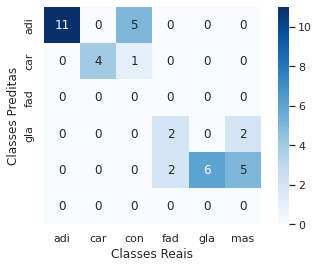

In [46]:
y = y_test_encoded
mat = confusion_matrix(y, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=label_encoder.inverse_transform(np.unique(y)),
            yticklabels=label_encoder.inverse_transform(np.unique(preds)),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

In [47]:
# Teste de acurácia
acc = g.opf_accuracy(y_test_encoded, preds)

print(f'Accuracy: {acc}')

Accuracy: 0.7506524600580973


---